In [1]:
!sudo apt install python3.7
!update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.7 2
!update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.1 1
!python --version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython3.7-minimal libpython3.7-stdlib mailcap mime-support
  python3.7-minimal
Suggested packages:
  python3.7-venv binfmt-support
The following NEW packages will be installed:
  libpython3.7-minimal libpython3.7-stdlib mailcap mime-support python3.7
  python3.7-minimal
0 upgraded, 6 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,698 kB of archives.
After this operation, 17.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 mailcap all 3.70+nmu1ubuntu1 [23.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 mime-support all 3.66 [3,696 B]
Get:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.7-minimal amd64 3.7.17-1+jammy1 [608 kB]
Get:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.7-minima

In [2]:
!git clone https://github.com/zhenruiliao/tension.git tension
!pip install -e tension

Cloning into 'tension'...
remote: Enumerating objects: 679, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 679 (delta 77), reused 91 (delta 50), pack-reused 525
Receiving objects: 100% (679/679), 14.03 MiB | 19.81 MiB/s, done.
Resolving deltas: 100% (385/385), done.
Obtaining file:///content/tension
  Preparing metadata (setup.py) ... done
  Running setup.py develop for tension


In [3]:
!pip install tensorflow==2.8.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.0/498.0 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 64.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 kB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 51.9 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorboard-data-server
    Found existing instal

In [4]:
try:
  import tension
except ImportError:
  !git clone https://github.com/zhenruiliao/tension.git tension
  !pip install -e tension
  print('Stopping RUNTIME! Please run again.')

In [ ]:
import os
os.kill(os.getpid(), 9)

In [1]:
from tension.base import FORCEModel
from tension.models import NoFeedbackESN, FullFORCEModel
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount("/content/drive")
import os
path="/content/drive/My Drive/AMP"
os.chdir(path)
os.listdir(path)  ####If not using in Colab, you can delete this.

Mounted at /content/drive


['deterministic.eps',
 'Transition time.pdf',
 'lorenz.npy',
 'spikinglorenz',
 'FIG3(b).npy',
 'atra.pdf',
 'datafordistribution.npy',
 'tension',
 'spiking15000proteindata.npy',
 'fullforcetrainingdata.npy',
 'stafflearning.pdf',
 'feike.pdf',
 'RCdoublewell100-200.npy',
 'fflearning.pdf',
 'fflearning_and_RC.pdf',
 'bistable.pdf',
 'realdata.npy',
 'Win.npy',
 'WoutPara.npy',
 'rFinalTrainTotal.npy',
 'Wxi.npy',
 'Wb.npy',
 'A.npy',
 'deterministic.pdf',
 'output1.npy',
 'output8.npy',
 'output4.npy',
 'output6.npy',
 'output7.npy',
 'data.npy',
 'output2.npy',
 'output9.npy',
 'output3.npy',
 'output5.npy',
 'realtime.npy',
 'predicttime.npy',
 'predictedproteindata.npy',
 'spiking7500proteindata.npy',
 'Transition_up time.pdf',
 'Transition_down time.pdf']

(1, 200001)
(200000, 1)


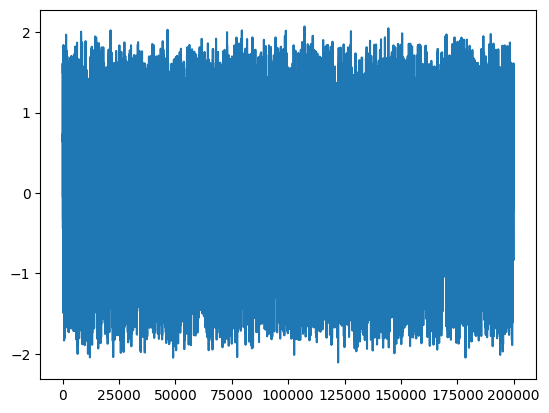

In [5]:
import numpy as np
dt = 0.01
dt_per_s = round(1 / dt)
# Assume num_steps and T are already defined
num_steps = 2000 * dt_per_s + 1  # For example, using previously defined num_steps
T = num_steps * dt               # Calculate total time T

# Parameters for white noise signal
dimensions = 1
a = 0
b = 5
c = 0
epsilon = 0.3

# Generate time series
xtime = np.linspace(0, T, num_steps)

# Initialize signal arrays
u = np.zeros((dimensions, num_steps))
q = np.zeros((dimensions, num_steps))

# Set initial condition
u[0, 0] = 1.5

# Generate white noise signal
for i in range(num_steps - 1):
   u[0, i + 1] = u[0, i] + dt * (-b * (-u[0, i] + u[0, i]**3 + c))
   q[0, i] = np.sqrt(dt * 2 * epsilon * b) * np.random.randn()
   u[0, i + 1] = u[0, i + 1] + q[0, i]

# Print the shape of u
print(np.shape(u))

# Reshape u to match the shape of targ
u = np.reshape(u, (num_steps, 1))
u_1 = u[:int((num_steps - 1))]
# np.save("/content/drive/My Drive/AMP/fullforcetrainingdata.npy", u_1)
u_1 = np.load("/content/drive/My Drive/AMP/fullforcetrainingdata.npy")
print(np.shape(u_1))
u = u[:10000]

plt.plot(u_1)


In [7]:
def fullforce_oscillation_test(dt, showplots=0):
    dt_per_s = round(1/dt)

    # From the paper, and the online demo:
    t = np.expand_dims(np.linspace(0,2,2*dt_per_s+1),1)
    #omega = np.zeros((2*dt_per_s+1,1))
    #omega = np.linspace(2*np.pi, 6*np.pi, 1*dt_per_s+1)
    targ = np.zeros((100*dt_per_s+1,1))
    #targ[0:(1*dt_per_s+1),0] = np.sin(t[0:(1*dt_per_s+1),0]*omega)
    #targ[1*dt_per_s:(2*dt_per_s+1)] = -np.flipud(targ[0:(1*dt_per_s+1)])

    # A simpler example: just a sine wave
    '''
    t = np.expand_dims(np.linspace(0,2,2*dt_per_s+1),1)
    omega = np.ones((2*dt_per_s+1,1)) * 4 *np.pi
    targ = np.sin(t*omega)
    '''

    # A slightly harder example: sum of sine waves

    t = np.expand_dims(np.linspace(0,2,2*dt_per_s+1),1)
    omega = np.ones((2*dt_per_s+1,1)) * 4 *np.pi
    targ = np.sin(t*2*omega) * np.sin(t*omega/4)
    targ=u

    inp = np.zeros(targ.shape)
    inp[0:round(0.05*dt_per_s),0] = np.ones((round(0.05*dt_per_s)))
    hints = np.zeros(targ.shape)

    if showplots == 1:
        plt.figure()
        plt.plot(targ)
        plt.plot(hints)
        plt.plot(inp)
        plt.legend(['Target','Hints','Input'])

    return inp, targ, hints

(10000, 2) (10000, 1)


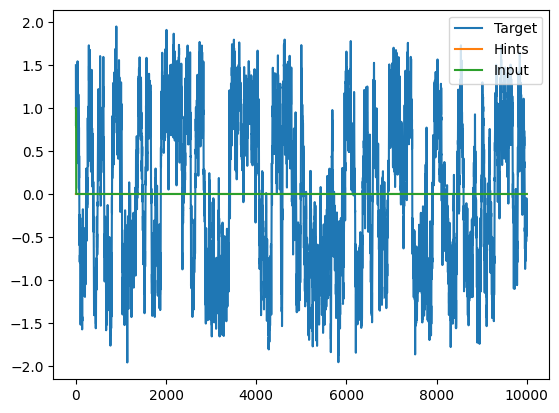

In [8]:
dt = 0.01
tau = 10*dt
inputs, target, hints = fullforce_oscillation_test(dt=dt,showplots=1)

inputs_with_hint = np.concatenate([inputs, hints], axis=1).astype(np.float32)
target = target.astype(np.float32)
hd = hints.shape[-1]
print(inputs_with_hint.shape, target.shape)

In [9]:
n_epoch = 10 # number of epochs to train
m = 1 # output dimension
n = 750 # number of recurrent neurons

In [11]:
%%time
####This is the force model, which takes too long. We use the full-force below.
tf.random.set_seed(123)

no_fb_esn_layer = NoFeedbackESN(dtdivtau=dt/tau,
                                units=n,
                                output_size=m,
                                activation='tanh',
                                seed=123)
force_model = FORCEModel(force_layer=no_fb_esn_layer)
force_model.compile(metrics=["mae"])
history = force_model.fit(x=inputs_with_hint,
                          y=target,
                          epochs=n_epoch)
predictions_force = force_model.predict(inputs_with_hint)

Epoch 1/10


KeyboardInterrupt: 

In [12]:
%%time

##Here is the full-FORCE model
tf.random.set_seed(123)

no_fb_esn_layer = NoFeedbackESN(dtdivtau=dt/tau,
                                units=n,
                                output_size=m,
                                activation='tanh',
                                seed=123)
ffmodel = FullFORCEModel(force_layer=no_fb_esn_layer,
                         hint_dim=hd,
                         target_output_kernel_trainable=False)
ffmodel.compile(metrics=["mae"])
history = ffmodel.fit(x=inputs_with_hint,
                      y=target,
                      epochs=n_epoch)
predictions_ff = ffmodel.predict(inputs)

Epoch 1/10
10000/10000 [==============================] - 68s 7ms/step - mae: 0.2818
Epoch 2/10
10000/10000 [==============================] - 68s 7ms/step - mae: 0.2962
Epoch 3/10
10000/10000 [==============================] - 66s 7ms/step - mae: 0.3165
Epoch 4/10
10000/10000 [==============================] - 65s 7ms/step - mae: 0.3239
Epoch 5/10
10000/10000 [==============================] - 69s 7ms/step - mae: 0.3318
Epoch 6/10
10000/10000 [==============================] - 68s 7ms/step - mae: 0.3325
Epoch 7/10
10000/10000 [==============================] - 67s 7ms/step - mae: 0.3896
Epoch 8/10
10000/10000 [==============================] - 67s 7ms/step - mae: 0.3803
Epoch 9/10
10000/10000 [==============================] - 72s 7ms/step - mae: 0.4756
Epoch 10/10
10000/10000 [==============================] - 66s 7ms/step - mae: 0.4701
CPU times: user 13min 47s, sys: 27.6 s, total: 14min 15s
Wall time: 11min 37s


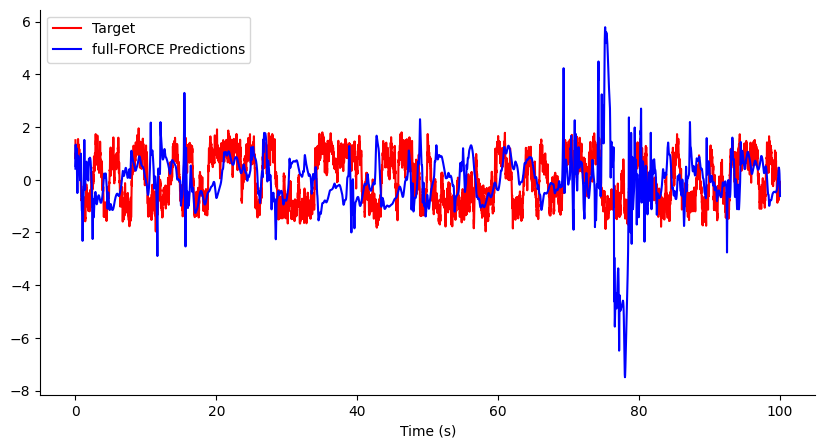

In [13]:
x = np.arange(0, inputs.shape[0]) * dt

fig, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(10,5))
ax1.plot(x, target, color='r', label='Target', linewidth=1.5)
ax1.plot(x, predictions_ff, color='b', label='full-FORCE Predictions', linewidth=1.5)
# ax1.plot(x, predictions_force, color='g', label='FORCE Predictions', linewidth=1.5)

ax1.set_xlabel('Time (s)')
ax1.legend()
sns.despine(ax=ax1)


(10000, 1)


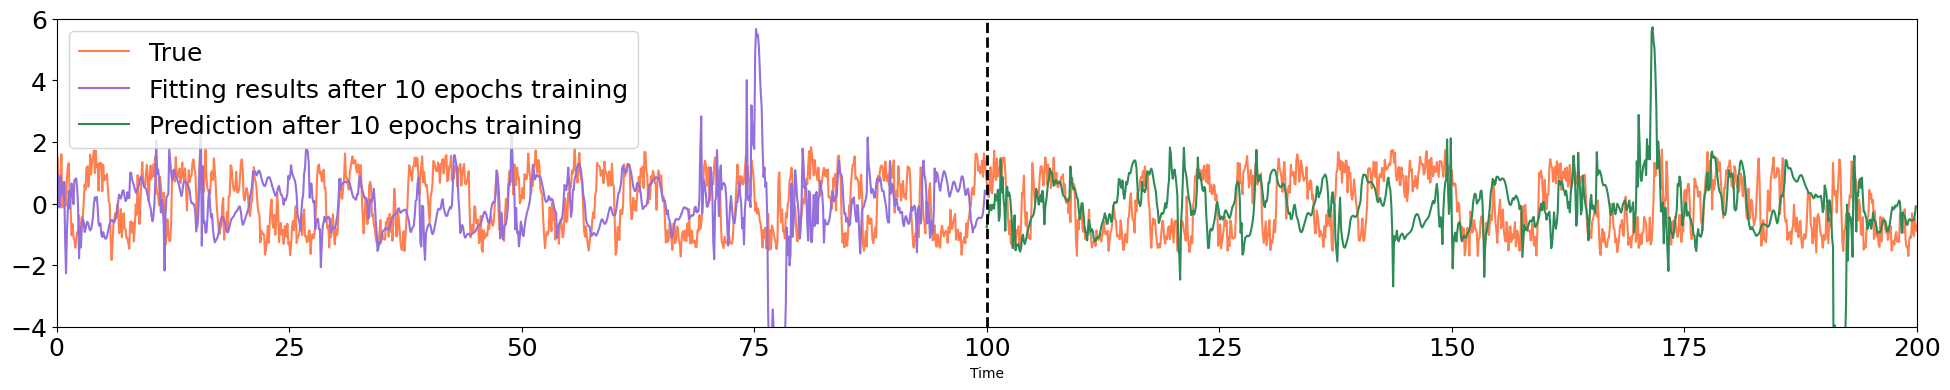

In [14]:
##plot the prediction of full-FORCE
print(np.shape(target))
inp = np.zeros((200000, 1))
hin = np.zeros((200000, 1))
inp[0:round(0.05*dt_per_s),0] = np.ones((round(0.05*dt_per_s)))
########################3
# predictions_ff = ffmodel.predict(inp)
# print(np.shape(predictions_ff))
xt = np.arange(0, inp.shape[0]) * dt
x = np.arange(0, inp.shape[0]) * dt
xtt = np.arange(0, inp.shape[0]) * dt
#####################33
inputs_with_hint=np.concatenate([inp, hin], axis=1).astype(np.float32)
predictions_ff = ffmodel.predict(inp)
# predictions_force = force_model.predict(inputs_with_hint)

new_x_values = x[::10]
new_xtt_values = xtt[::10]
t_start = 10000  #
t_end = 200000    #
fig, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(24,4))

ax1.plot(new_xtt_values, u_1[::10, 0], color='coral', label='True', linewidth=1.5)
# ax1.plot(x[t_start:t_end], predictions_ff[t_start:t_end], color='seagreen', label='Predicted', linewidth=1.5)
ax1.plot(new_xtt_values[0:1000], predictions_ff[::10,0][0:1000], color='#9370DB', label='Fitting results after 10 epochs training', linewidth=1.5)
ax1.plot(new_xtt_values[1000:2000], predictions_ff[::10,0][1000:2000], color='seagreen', label='Prediction after 10 epochs training', linewidth=1.5)
# ax1.plot(new_xtt_values[0:1000], predictions_ff[::10,0][0:1000], color='#9370DB', label='Fitting results after 10 epochs training', linewidth=1.5)

ax1.axvline(x=t_start*dt, color='black', linestyle='dashed', linewidth=2)
ax1.tick_params(axis='x', labelsize=18)  #
ax1.tick_params(axis='y', labelsize=18)  #

ax1.set_xlabel('Time')
ax1.legend(loc='upper left', prop={'size': 18}, title_fontsize=18)
for spine in ['top', 'right', 'bottom', 'left']:
    ax1.spines[spine].set_visible(True)
plt.ylim(-4,6)
plt.xlim(0,200)
plt.savefig(f"/content/drive/My Drive/AMP/fflearning.pdf", bbox_inches='tight') ## replace with your path

In [15]:
u_rc=np.load("/content/drive/My Drive/AMP/RCdoublewell100-200.npy") ### replace with your path

u_rc = np.reshape(u_rc, (10000, 1))

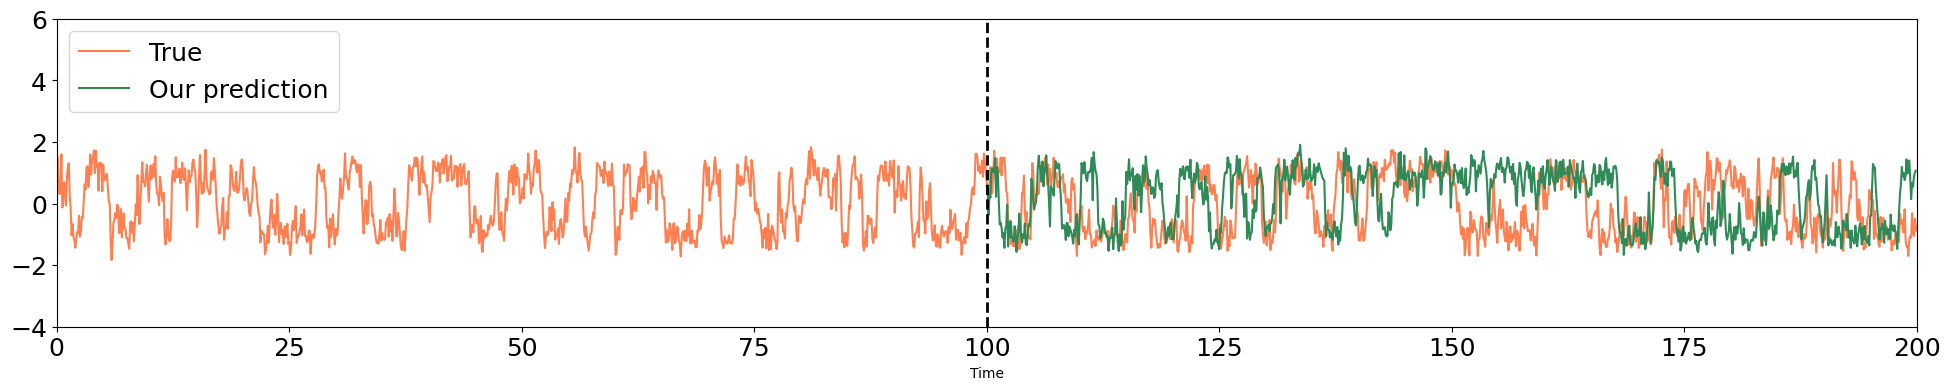

In [16]:
### plot the prediction of our rc model
fig, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(24,4))

ax1.plot(new_xtt_values, u_1[::10, 0], color='coral', label='True', linewidth=1.5)
# ax1.plot(x[t_start:t_end], predictions_ff[t_start:t_end], color='seagreen', label='Predicted', linewidth=1.5)
ax1.plot(new_xtt_values[1000:2000], u_rc[::10,0][0:1000], color='seagreen', label='Our prediction', linewidth=1.5)
# ax1.plot(new_xtt_values[0:1000], predictions_ff[::10,0][0:1000], color='#9370DB', label='Fitting results after 10 epochs training', linewidth=1.5)

ax1.axvline(x=t_start*dt, color='black', linestyle='dashed', linewidth=2)
ax1.tick_params(axis='x', labelsize=18)  #
ax1.tick_params(axis='y', labelsize=18)  #

ax1.set_xlabel('Time')
ax1.legend(loc='upper left', prop={'size': 18}, title_fontsize=18)
for spine in ['top', 'right', 'bottom', 'left']:
    ax1.spines[spine].set_visible(True)
plt.ylim(-4,6)
plt.xlim(0,200)
plt.savefig(f"/content/drive/My Drive/AMP/fflearning_and_RC.pdf", bbox_inches='tight')### replace with your path

In [17]:
###compute the transition time

from matplotlib.ticker import FixedLocator, FixedFormatter,FuncFormatter,FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter, ScalarFormatter, AutoMinorLocator
plt.rc('font',size=15)

def distribution(data,T_times,T_interval):  #To evaluate the transition time and number
    '''
    Change the time series to three numbers:
        -1 if <0
        0 if =0
        1 if >0
    and put these results in sign,
    '''
    xshape=np.shape(data)[0]
    yshape=np.shape(data)[1]
    count=0
    index_up=0
    index_down=0
    length=max(xshape,yshape)
    diff=[]
    position=[]
    if yshape > xshape:
        data = data.T
    sign=np.sign(data)

    '''
    Consider where the symbol changed, and put these results in position,
    when changed, transition might happen.
    '''
    for i in range (length-1):
        diff.append(sign[i+1,0]-sign[i,0])
        if diff[i]!=0:
            position.append(i)

    '''
    Initialization
    '''
    for i in range (np.shape(sign)[0]):
        if sign[i,0]!=0:
            state=sign[i,0]
            index_up=i
            index_down=i
            break

    '''
    Evaluation
    '''
    for i in range (len(position)):
        if i!=len(position)-1:
            if state<0:
                if diff[position[i]]>0:
                    if np.max(data[position[i]:position[i+1],0])>=1 :
                        peroid=data[position[i]:position[i+1],0]
                        index_up=list(peroid>=1).index(True) + position[i]
                        T_interval.append(index_up-index_down)
                        state=1
                        count+=1

            elif state>0:
                if diff[position[i]]<0:
                    if np.min(data[position[i]:position[i+1],0])<=-1 :
                        peroid=data[position[i]:position[i+1],0]
                        index_down=list(peroid<=-1).index(True) + position[i]
                        T_interval.append(index_down-index_up)
                        state=-1
                        count+=1
        else:
            if state<0:
                if diff[position[i]]>0:
                    if np.max(data[position[i]:,0])>=1 :
                        peroid=data[position[i]:,0]
                        index_up=list(peroid>=1).index(True) + position[i]
                        T_interval.append(index_up-index_down)
                        state=1
                        count+=1
            elif state>0:
                if diff[position[i]]<0:
                    if np.min(data[position[i]:,0])<=-1 :
                        peroid=data[position[i]:,0]
                        index_down=list(peroid<=-1).index(True) + position[i]
                        T_interval.append(index_down-index_up)
                        state=-1
                        count+=1
    T_times.append(count)


def draw_distribution(a,b,title,xlable,bins_interval=2,margin=1):  #To draw the PDF of evaluation between test and predicted data
    '''
    This part is to draw the PDF between a and b
    '''
    data=[a,b]
    left = min(np.min(a),np.min(b))
    right = max(np.max(a),np.max(b))
    bins= np.arange(math.floor(left), math.ceil(right), bins_interval)
    plt.xlim(math.floor(left) - margin, math.ceil(right) + margin)
    plt.xlim(0,25)
    plt.xlabel(xlable)
    plt.ylabel('Frequency')
    plt.hist(data, bins=bins, density=True, color=['coral','seagreen'])

    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))  #Y-axis with 2 decimal places
    ax = plt.gca()
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True, nbins=6)) # X-axis with 5 ticks
    ax.yaxis.set_major_locator(FixedLocator(ax.get_yticks()))
    ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=5)) #Y-axis with 6 ticks

    if xlable == 'Number' :
        plt.legend(['True: '+str(round(np.mean(a),2)),'Predicted: '+str(round(np.mean(b),2))],title='Average number of transitions',fontsize=13.5 ,loc='upper right')
    else:
        plt.legend(['True: '+str(round(np.mean(a),2)),'Predicted: '+str(round(np.mean(b),2))],prop={'size': 15},title_fontsize= 15,title='Average transition time',loc='upper right')
        # plt.rcParams.update({'font.size':15})
        plt.savefig(f"/content/drive/My Drive/AMP/stafflearning.pdf", bbox_inches='tight')  ###replace with your path
    plt.savefig(title + '.pdf',bbox_inches = 'tight')
    plt.show()

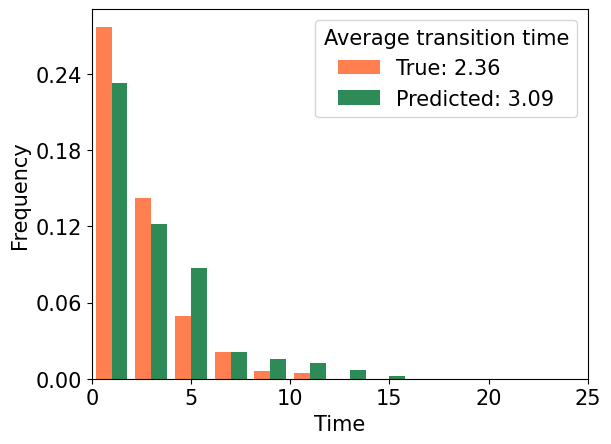

In [18]:
a=[]
b=[]
au=[]
bu=[]
BU=[]
B=[]
import math
c=predictions_ff[:,0]

c=np.reshape(c,(1,num_steps-1))
distribution(c,a,b)
distribution(u_1,au,bu)
# step_value=50
BU=[x*0.01 for x in bu]  ###dt=0.01
B=[x*0.01 for x in b]
# draw_distribution(bu,b,"feike",'Time')  # 前面的 是真的
draw_distribution(BU,B,"feike",'Time')
# draw_distribution(au,a,"zongky",'Number') #次数